## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import ast
import shap

d:\MyApps\Anaconda\envs\nle\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
d:\MyApps\Anaconda\envs\nle\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_si

## Use resulted SHAP data

In [ ]:
some_df = pd.read_csv('movies_120_shap_119.csv')
def get_literal_eval(x):
    x = np.array(ast.literal_eval(x)).astype('object')
    return x

some_df.shap_values = some_df.shap_values.apply(get_literal_eval)
some_df.shap_base_values = some_df.shap_base_values.apply(get_literal_eval)
some_df.shap_data = some_df.shap_data.apply(get_literal_eval)


In [28]:
import shap

idx = 9
shap_values = shap.Explanation(sample_df.shap_values[idx], sample_df.shap_base_values[idx], sample_df.shap_data[idx]) 

shap.plots.text(shap_values, grouping_threshold=0.005)

NameError: name 'shap' is not defined

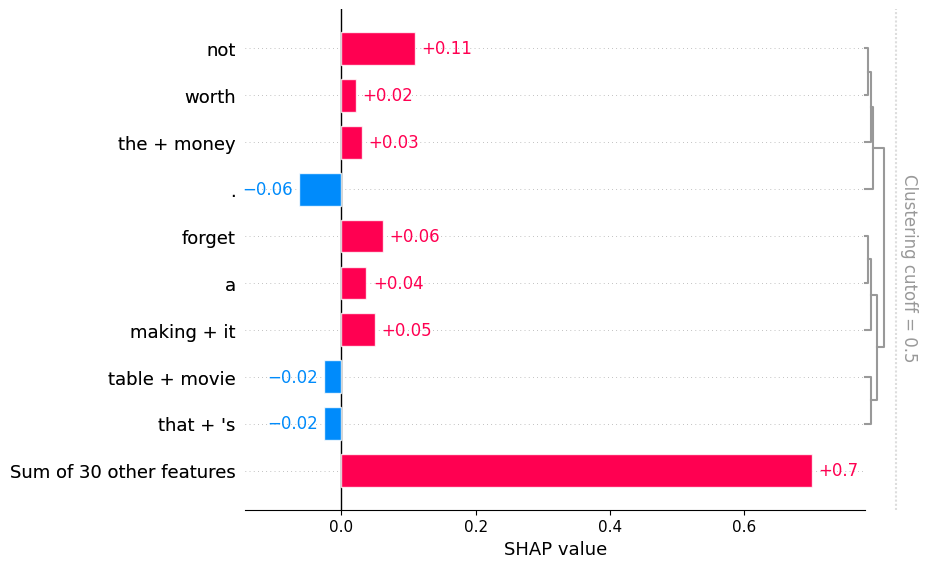

In [16]:
shap.plots.bar(shap_values[0,:,'negative'], clustering_cutoff=0.5)

## Obtain NLE Embeddings

In [173]:
import torch
roberta = torch.hub.load('pytorch/fairseq', 'roberta.large', verbose=0)
roberta.eval()  # disable dropout (or leave in train mode to finetune)
roberta.to('cuda')

2023-06-29 00:54:48 | INFO | fairseq.file_utils | loading archive file http://dl.fbaipublicfiles.com/fairseq/models/roberta.large.tar.gz from cache at C:\Users\sonne\.cache\torch\pytorch_fairseq\83e3a689e28e5e4696ecb0bbb05a77355444a5c8a3437e0f736d8a564e80035e.c687083d14776c1979f3f71654febb42f2bb3d9a94ff7ebdfe1ac6748dba89d2


Unable to build Cython components. Please make sure Cython is installed if the torch.hub model you are loading depends on it.


hydra.experimental.initialize() is no longer experimental. Use hydra.initialize()

The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
hydra.experimental.compose() is no longer experimental. Use hydra.compose()
In 'config': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/changes_to_package_header for more information

'config' is validated against ConfigStore schema with the same name.
This behavior is deprecated in Hydra 1.1 and will be removed in Hydra 1.2.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/automatic_schema_matching for migration instructions.

The strict flag in the compose API is deprecated.
See https://hydra.cc/docs/1.2/upgrades/0.11_to_1.0/strict_mode_flag_deprecated for more info.

hydra.experimental.initialize() is no longer experimental. Use hydra.initialize()

The version_base parameter is not specified.
Ple

RobertaHubInterface(
  (model): RobertaModel(
    (encoder): RobertaEncoder(
      (sentence_encoder): TransformerEncoder(
        (dropout_module): FairseqDropout()
        (embed_tokens): Embedding(50265, 1024, padding_idx=1)
        (embed_positions): LearnedPositionalEmbedding(514, 1024, padding_idx=1)
        (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (layers): ModuleList(
          (0-23): 24 x TransformerEncoderLayerBase(
            (self_attn): MultiheadAttention(
              (dropout_module): FairseqDropout()
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
       

In [174]:
to_tok = list(df_cose.columns)
for x in ['id', 'label']:
    to_tok.remove(x)
tok_df_cose = df_cose.copy()
tok_df_cose[to_tok] = tok_df_cose[to_tok].apply(lambda x: [roberta.encode(str(s)) for s in x])
tok_df_cose

NameError: name 'df_cose' is not defined

In [ ]:

tok_model_nle = roberta.encode(model_nle)
tok_choices = [roberta.encode(ch) for ch in choices]

# embed the tokens using the last layer feature of the model
emb_model_nle = roberta.extract_features(tok_model_nle)
tok_choices = [roberta.extract_features(ch) for ch in tok_choices]


## Calculate SHAP Score

In [ ]:
import transformers
import shap
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

text_data = "This book is pretty interesting but it's too long"

explainer = shap.Explainer(model) 
shap_values = explainer([text_data])
shap_values

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


.values =
array([[[ 0.        ,  0.        ],
        [-0.01345348,  0.01345348],
        [ 0.00926322, -0.00926323],
        [-0.01751831,  0.01751831],
        [-0.05586129,  0.05586129],
        [-0.39003555,  0.39003555],
        [ 0.15331828, -0.15331826],
        [-0.04646818,  0.04646816],
        [-0.06173874,  0.06173873],
        [ 0.04031968, -0.04031966],
        [ 0.36652539, -0.36652541],
        [ 0.34822644, -0.34822645],
        [ 0.        ,  0.        ]]])

.base_values =
array([[0.66618073, 0.3338193 ]])

.data =
(array(['', 'This ', 'book ', 'is ', 'pretty ', 'interesting ', 'but ',
       'it', "'", 's ', 'too ', 'long', ''], dtype=object),)

In [ ]:
import transformers
import shap
import torch

device = torch.device('cuda:0')
# load the model
pmodel = transformers.pipeline('question-answering', device=device)

# define two predictions, one that outputs the logits for the range start,
# and the other for the range end
def f(questions, start):
    outs = []
    for q in questions:
        print(q)
        question, context = q.split("[SEP]")
        d = pmodel.tokenizer(question, context)
        out = pmodel.model.forward(**{k: torch.tensor(d[k]).reshape(1, -1).to(device) for k in d})
        logits = out.start_logits if start else out.end_logits
        outs.append(logits.reshape(-1).cpu().detach().numpy())
    return outs

def f_start(questions):
    return f(questions, True)
def f_end(questions):
    return f(questions, False)

# attach a dynamic output_names property to the models so we can plot the tokens at each output position
def out_names(inputs):
    question, context = inputs.split("[SEP]")
    d = pmodel.tokenizer(question, context)
    return [pmodel.tokenizer.decode([id]) for id in d["input_ids"]]
f_start.output_names = out_names
f_end.output_names = out_names

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
data = ["What is on the table?[SEP]When I got home today I saw my cat on the table, and my frog on the floor."]
# pmodel.tokenizer(data, mask=)
import tiktoken
enc = tiktoken.encoding_for_model("gpt-4-0613")
len(enc.encode(data[0]))

28

In [ ]:
data

['What is on the table?[SEP]When I got home today I saw my cat on the table, and my frog on the floor.']

In [ ]:
data = ["What is on the table?[SEP]When I got home today I saw my cat on the table, and my frog on the floor."]
pmodel.tokenizer.mask_token_id

103

In [ ]:
pmodel.tokenizer(data)


{'input_ids': [[101, 1327, 1110, 1113, 1103, 1952, 136, 102, 1332, 146, 1400, 1313, 2052, 146, 1486, 1139, 5855, 1113, 1103, 1952, 117, 1105, 1139, 13670, 1113, 1103, 1837, 119, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
data = ["What is on the table?[SEP]When I got home today I saw my cat on the table, and my frog on the floor."]

# explainer_start = shap.Explainer(f_start, pmodel.tokenizer)
# explainer_start = shap.Explainer(f_start, pmodel.tokenizer)
class tokenizer:
    def __init__(self) -> None:
        self.tokenizer = pmodel.tokenizer
    def __call__(self, x):
        return {"input_ids":pmodel.tokenizer(x)['input_ids']}
    def decode(self, x):
        return pmodel.tokenizer.decode(x)
tok = shap.maskers.Text(tokenizer(), mask_token='...', collapse_mask_token=True)


# explainer_start = shap.Explainer(f_start, masker=tok)
explainer_start = shap.Explainer(f_start, pmodel.tokenizer)


shap_values_start = explainer_start(data, batch_size=1)

shap.plots.text(shap_values_start)

TypeError: __call__() got an unexpected keyword argument 'progress_bar'

: 

In [ ]:
data = ["What is on the table?[SEP]When I got home today I saw my cat on the table, and my frog on the floor."]
def make_answer_scorer(answers):
    def f(questions):
        out = []
        for q in questions:
            question, context = q.split("[SEP]")
            results = pmodel(question, context, top_k=20)
            values = []
            for answer in answers:
                value = 0
                for result in results:
                    if result["answer"] == answer:
                        value = result["score"]
                        break
                values.append(value)
            out.append(values)
        return out
    f.output_names = answers
    return f

f_answers = make_answer_scorer(["my cat", "cat", "my frog"])

explainer_answers = shap.Explainer(f_answers, pmodel.tokenizer)
shap_values_answers = explainer_answers(data)

shap.plots.text(shap_values_answers)

In [ ]:
shap_values_answers

.values =
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.69124413e-02, -5.52253337e-02,  8.65240455e-03],
        [-1.34780238e-02, -4.12751370e-02, -1.56310292e-02],
        [ 2.09620141e-03,  5.29225320e-02, -2.64582045e-02],
        [ 4.88220479e-02,  6.25952940e-02, -2.01617490e-02],
        [ 1.39899513e-01,  1.11438790e-01, -8.14635345e-02],
        [ 1.25926260e-02,  4.20484598e-02,  1.09544975e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.52645899e-03, -3.15239110e-03,  8.66274782e-04],
        [ 3.52645899e-03, -3.15239110e-03,  8.66274782e-04],
        [ 3.20395688e-03, -1.45857349e-02,  4.32692908e-03],
        [ 3.20395688e-03, -9.66237406e-03,  4.04172768e-03],
        [ 3.94194270e-03,  2.23734954e-02, -5.09236679e-03],
        [ 3.94194270e-03,  2.25603571e-02, -3.52081549e-03],
        [-6.36603909e-04, -2.52694754e-02,  2.20085294e-03],
        [ 1.13435351e-01,  3.38443481e-02, -7.09942254e-03],
        [ 4.24

In [ ]:
len(shap_values_answers.data[0])

29